# DNSC 6303_11 – Programming for Analytics II 
# Final Project Statement – Team 2

# Team 2 Members: 
# Maneesh Tekwani, Sai Nityamani Sahith Matsa, Manuel Jonathan Chavez Caprio, Patrick Zelazko

## Assignment Brief
__Title:__ Electric Vehicle Adoption Trends in Washington State (2017-2023)

__Topic:__ Team 2 will be analyzing adoption trends in the electric car market to derive information on the major players in the industry and their successful car model and makes as observed through recent adoption trends in Washington State (WA State Gov Data) in the backdrop of broader trends across the broader US (DoE Data).

Furthermore, we aim to gain understanding about the role that state tax exemptions and incentives as the ones WA government offers play in EV adoption. Holistically, we will paint a picture of the market of EV cars and understand how the landscape has evolved since 2017 in relation to broader social, economic, and technological trends in WA and the Seattle area. 

We aim to build this report to generate insights useful for car manufacturing companies who are either looking to expand in the EV space or planning to explore it as new entrants.


__Topics Covered within this Analysis__
- Variables
- Data Frames
- Lists (arrays) and Dictionaries
- Pandas as pd (To read Excel File)
- NumPy as np (For Numerical Arrays)
- MatPlotLib and Seaborns (For Numerical Representations, Graphs etc.)
- Simple Linear Regression
- Muliple Linear Regression 
- Webscraping (Using Webscraping to Provide more infromation 
- Simple Optimization and Optimization using command lines (pip)
- Clustering Data Techniques (K Means)

### Importing all the packages

In [229]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the Dataset

In [230]:
mydf = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [231]:
mydf.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [232]:
mydf.shape

(150482, 17)

### Examining Data within the EV Data Frame

In [233]:
#Examining all the columns within the dataset
mydf.keys()

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

### Cleaning the Dataset to work with

In [234]:
#Examining the dataset before cleaning with
mydf.shape 

(150482, 17)

In [235]:
#Dropping all the NA values to get a clean data set to work with
EDF=mydf.dropna()

In [236]:
#Looking at the dataset, there are Electric Cars with Zero Range.
#Tesla makes electric cars only, but there are Tesla's with the Electric Range = 0
#Initially we were thinking of only considering Battery Electric Vehicle (BEV) but there are outliers
EDF_ZeroRange=EDF[EDF['Electric Range']==0]

In [237]:
#To address the NA values with Electric Range = 0
#This dataset has only EV Cars (Battery Electric Vehicle (BEV) and Plug-in Hybrid Electric Vehicle (PHEV)
EDF_ActualData = EDF[EDF['Electric Range']>0]
EDF_ActualData

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150461,5YJSA1E28G,King,Kent,WA,98030.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,47.0,229126621,POINT (-122.199755 47.37483),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
150462,5YJ3E1ECXL,Pierce,Bonney Lake,WA,98391.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,31.0,102879556,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
150467,5YJYGDEF1L,Snohomish,Edmonds,WA,98026.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,32.0,132730125,POINT (-122.335685 47.80372),PUGET SOUND ENERGY INC,5.306105e+10
150468,KNDJX3AE4G,Whatcom,Bellingham,WA,98225.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,42.0,223923871,POINT (-122.486115 48.761615),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10


In [238]:
#We want to only explore the EV Battery Electric Vehicles (BEV)
EV_df=EDF_ActualData[EDF_ActualData['Electric Vehicle Type']=='Battery Electric Vehicle (BEV)']

In [239]:
#Looking at the shape of the dataset after dropping NA values
EV_df.shape

(47003, 17)

In [240]:
EV_df[['Electric Vehicle Type']].value_counts()

Electric Vehicle Type         
Battery Electric Vehicle (BEV)    47003
dtype: int64

## Retrieving Insights on the Dataset

### Confirming that we are working only with Electric Vehicle Type

In [241]:
EV_df[['Electric Vehicle Type']].value_counts()

Electric Vehicle Type         
Battery Electric Vehicle (BEV)    47003
dtype: int64

Battery Electric Vehicle (BEV)    47003

### Consumption of EV Cars Based on Location (e.g. County, City, Postal Code)

__Consumption on EV Cars Based on County__

_Which have the County has the most and least consumption of EV Cars? (Top 5 and Bottom 5)_

In [242]:
CountyConsumption = EV_df['County'].value_counts()
Top5County=CountyConsumption.head(5)
Top5County

King         25023
Snohomish     5105
Pierce        3318
Clark         2662
Thurston      1727
Name: County, dtype: int64

In [243]:
CountyConsumption = EV_df['County'].value_counts()
CountyConsumption.tail(5)

Pend Oreille    12
Wahkiakum       12
Ferry           10
Lincoln          8
Columbia         5
Name: County, dtype: int64

_Visualizations for Top 5 County Consumption_

Text(0.5, 1.0, 'Top 5 Counties by EV Consumption')

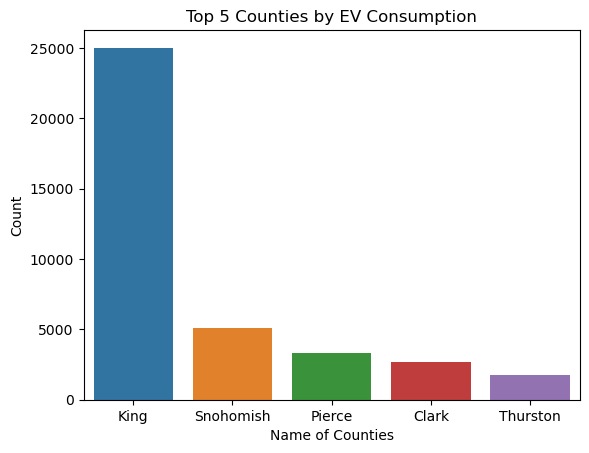

In [244]:
sns.barplot(x=Top5County.index, y=Top5County.values)
plt.xlabel('Name of Counties')
plt.ylabel('Count')
plt.title('Top 5 Counties by EV Consumption')

__Consumption on EV Cars Based on City__

_Which Cities have the most and least consumption of EV Cars? (Top 5 and Bottom 5)_

In [245]:
CityConsumption = EV_df['City'].value_counts()
Top5City=CityConsumption.head(5)
Top5City

Seattle      8821
Bellevue     2529
Redmond      1803
Vancouver    1598
Kirkland     1577
Name: City, dtype: int64

In [246]:
CityConsumption.tail(5)

Bingen        1
Coulee Dam    1
Inchelium     1
Curlew        1
Touchet       1
Name: City, dtype: int64

_Visualizations for Top 5 County Consumption_

Text(0.5, 1.0, 'Top 5 Cities by EV Consumption')

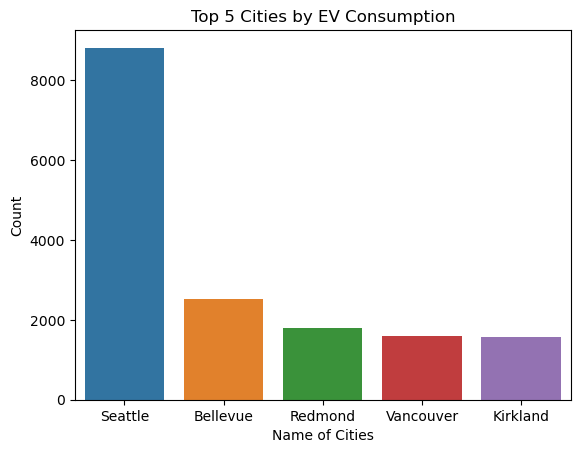

In [247]:
sns.barplot(x=Top5City.index, y=Top5City.values)
plt.xlabel('Name of Cities')
plt.ylabel('Count')
plt.title('Top 5 Cities by EV Consumption')

__Consumption on EV Cars Based on Postal Codes__

_Which Postal Codes have the most and least consumption of EV Cars? (Top 5 and Bottom 5)_

In [248]:
PostalCodeConsumption = EV_df['Postal Code'].value_counts()
Top5PostalCodes=PostalCodeConsumption.head(5) 
Top5PostalCodes

98052.0    1210
98033.0     908
98115.0     837
98006.0     811
98004.0     786
Name: Postal Code, dtype: int64

In [249]:
PostalCodeConsumption = EV_df['Postal Code'].value_counts()
PostalCodeConsumption.tail(5)

99116.0    1
99138.0    1
99118.0    1
98614.0    1
99360.0    1
Name: Postal Code, dtype: int64

_Visualizations for Top 5 Postal Codes by EV Consumpution_

Text(0.5, 1.0, 'Top 5 Postal Codes by EV Consumpution')

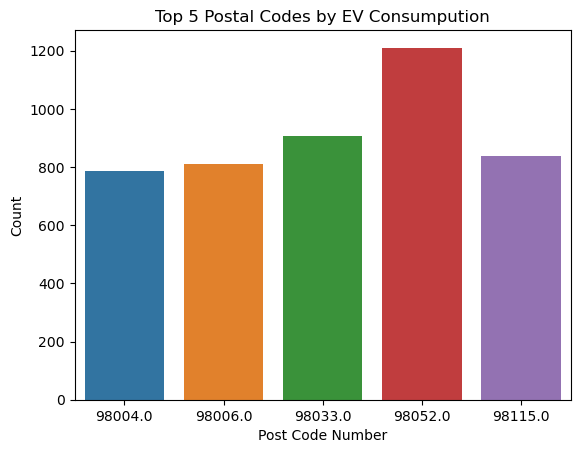

In [250]:
sns.barplot(x=Top5PostalCodes.index, y=Top5PostalCodes.values)
plt.xlabel('Post Code Number')
plt.ylabel('Count')
plt.title('Top 5 Postal Codes by EV Consumpution')

### Popularity of EV Cars Based on Vehicle Characteristics (e.g. M ake and Model)

__Examining Vehicle Makes (Different Car Brands)__

In [251]:
CarMakePopularity = EDF['Make'].value_counts()

In [252]:
CarMakePopularity.nunique() #There are 36 EV Car Makes that are used within the state of WA

36

In [253]:
CarMakePopularity.keys() #The names of all the 36 Car Makes

Index(['TESLA', 'NISSAN', 'CHEVROLET', 'FORD', 'BMW', 'KIA', 'TOYOTA',
       'VOLKSWAGEN', 'VOLVO', 'JEEP', 'HYUNDAI', 'AUDI', 'CHRYSLER', 'RIVIAN',
       'MERCEDES-BENZ', 'PORSCHE', 'MITSUBISHI', 'HONDA', 'FIAT', 'MINI',
       'POLESTAR', 'SUBARU', 'SMART', 'LINCOLN', 'JAGUAR', 'LUCID', 'CADILLAC',
       'LEXUS', 'MAZDA', 'GENESIS', 'LAND ROVER', 'FISKER', 'ALFA ROMEO',
       'AZURE DYNAMICS', 'TH!NK', 'WHEEGO ELECTRIC CARS', 'BENTLEY'],
      dtype='object')

In [254]:
EV_df['Make'].value_counts() #A count for the number of Instances for Each Car Make 

TESLA             25819
NISSAN            10989
CHEVROLET          3955
KIA                1493
VOLKSWAGEN         1073
FIAT                806
AUDI                648
BMW                 557
SMART               274
HYUNDAI             271
FORD                251
PORSCHE             206
JAGUAR              199
MINI                124
POLESTAR            118
MERCEDES-BENZ        88
TOYOTA               59
MITSUBISHI           59
AZURE DYNAMICS        9
TH!NK                 5
Name: Make, dtype: int64

_What are the Top 5 cars makes within the state of WA?_

In [255]:
Top5CarMakes=EV_df['Make'].value_counts().head()

Text(0.5, 1.0, 'Top 5 Car Makes/Brands within the state of WA')

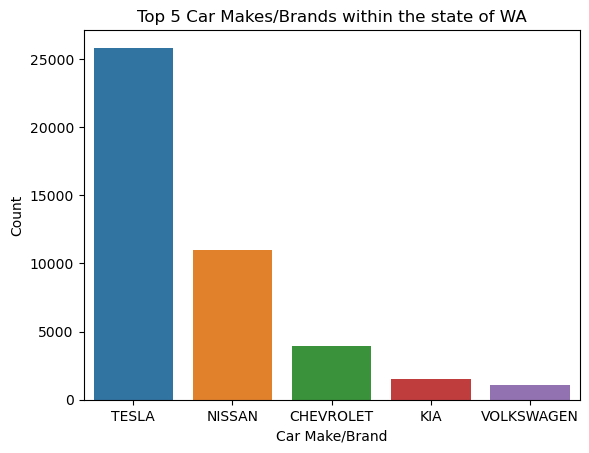

In [256]:
sns.barplot(x=Top5CarMakes.index, y=Top5CarMakes.values)
plt.xlabel('Car Make/Brand')
plt.ylabel('Count')
plt.title('Top 5 Car Makes/Brands within the state of WA')

_Deriving the Companies with the Highest Market Share_

In [257]:
EV_df['Make'].count()

47003

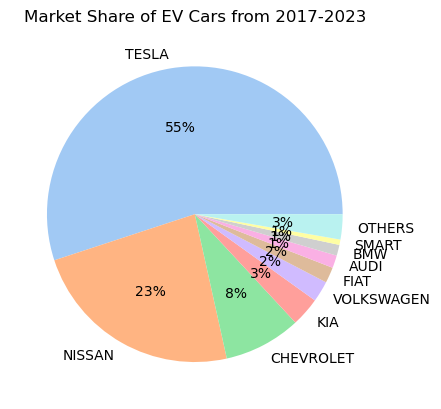

In [258]:
data = [25819, 10989, 3955, 1493, 1073, 806, 648, 557, 274, 1289]
labels = ['TESLA', 'NISSAN', 'CHEVROLET', 'KIA', 'VOLKSWAGEN', 'FIAT', 'AUDI', 'BMW', 'SMART', 'OTHERS']

# Defining the colors
colors = sns.color_palette('pastel')[0:10]

# Create the pie chart and assiging it atitle
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.title("Market Share of EV Cars from 2017-2023")

# Show the pie chart
plt.show()

_Examining the Top 5 Car Makes and their most popular Car Models_

* Which are Tesla EV Models are Most Consumed? 

In [259]:
EV_Tesla=EV_df[EV_df['Make']=='TESLA']

In [260]:
EV_Tesla['Model'].value_counts()

MODEL 3     14056
MODEL S      6142
MODEL X      3303
MODEL Y      2272
ROADSTER       46
Name: Model, dtype: int64

* Which are Nissan EV Models are Most Consumed? 

In [261]:
EV_Nissan=EV_df[EV_df['Make']=='NISSAN']

In [262]:
EV_Nissan['Model'].value_counts()

LEAF    10989
Name: Model, dtype: int64

* Which are Chevrolet EV Models are Most Consumed?

In [263]:
EV_Chevrolet=EV_df[EV_df['Make']=='CHEVROLET']

In [264]:
EV_Chevrolet['Model'].value_counts()

BOLT EV        3706
SPARK           248
S-10 PICKUP       1
Name: Model, dtype: int64

* Which Kia EV Models are Most Consumed?

In [265]:
EV_Kia=EV_df[EV_df['Make']=='KIA']

In [266]:
EV_Kia['Model'].value_counts()

NIRO       848
SOUL       420
SOUL EV    225
Name: Model, dtype: int64

* Which Volkswagen EV Models are Most Consumed?

In [267]:
EV_Volkswagen=EV_df[EV_df['Make']=='VOLKSWAGEN']

In [268]:
EV_Volkswagen['Model'].value_counts()

E-GOLF    1073
Name: Model, dtype: int64

In [269]:
# The Top model is each brands are as follows:
#     TESLA - MODEL 3
#     NISSAN - LEAF
#     CHEVROLET - BOLT EV
#     KIA - NIRO
#     VOLKSWAGEN - E-GOLF

__Drawing a Barplot to Visually Present the Top 5 Makes and their Top Models by frequency__

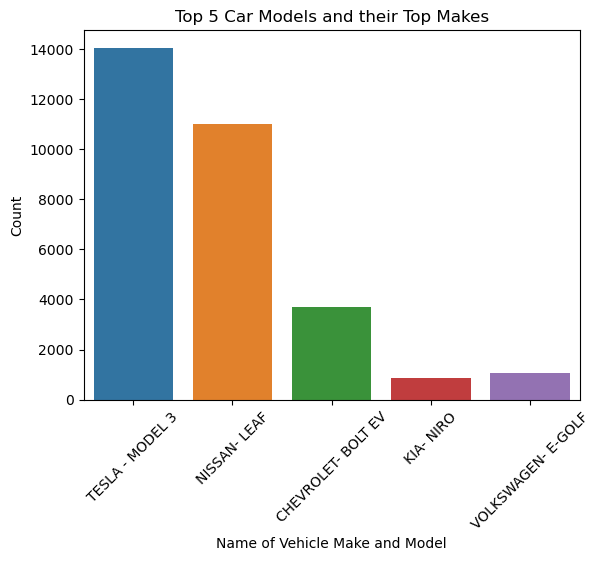

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt

data = [14056, 10989, 3706, 848, 1073]
labels = ['TESLA - MODEL 3', 'NISSAN- LEAF', 'CHEVROLET- BOLT EV', 'KIA- NIRO', 'VOLKSWAGEN- E-GOLF']
sns.barplot(x=labels, y=data)
plt.xlabel('Name of Vehicle Make and Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Top 5 Car Models and their Top Makes')
plt.show()

### Examining Data for EV Cars Based on Range (EV Cars and their Range)

__Overall Range for all EV cars:__ What is the Range for EV Cars?

<Axes: xlabel='Electric Range'>

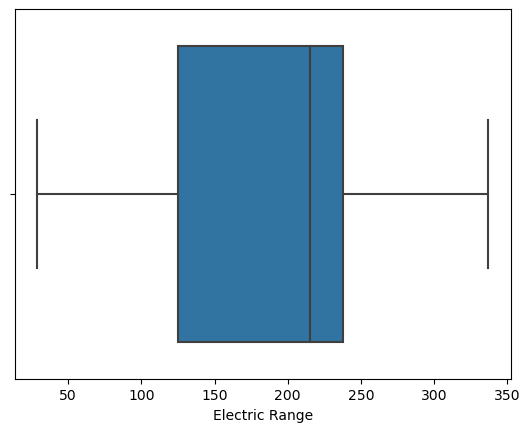

In [271]:
import seaborn as sns
sns.boxplot(data=EV_df, x="Electric Range")

In [272]:
EV_df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
5,5YJ3E1EAXL,Snohomish,Marysville,WA,98271.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,38.0,124595523,POINT (-122.1713847 48.10433),PUGET SOUND ENERGY INC,5.306194e+10
7,5YJYGDEE3L,King,Woodinville,WA,98072.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,45.0,124760555,POINT (-122.151665 47.75855),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
8,5YJ3E1EA1J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,125048003,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150458,5YJ3E1EB0J,Spokane,Liberty Lake,WA,99019.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,4.0,285861670,POINT (-117.0923638 47.6643385),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
150461,5YJSA1E28G,King,Kent,WA,98030.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,47.0,229126621,POINT (-122.199755 47.37483),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
150462,5YJ3E1ECXL,Pierce,Bonney Lake,WA,98391.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,31.0,102879556,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
150467,5YJYGDEF1L,Snohomish,Edmonds,WA,98026.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,32.0,132730125,POINT (-122.335685 47.80372),PUGET SOUND ENERGY INC,5.306105e+10


In [273]:
EV_df['Electric Range']

0         258
3         215
5         266
7         291
8         215
         ... 
150458    215
150461    210
150462    308
150467    291
150468     93
Name: Electric Range, Length: 47003, dtype: int64

In [274]:
EV_Tesla

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
5,5YJ3E1EAXL,Snohomish,Marysville,WA,98271.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,38.0,124595523,POINT (-122.1713847 48.10433),PUGET SOUND ENERGY INC,5.306194e+10
7,5YJYGDEE3L,King,Woodinville,WA,98072.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,45.0,124760555,POINT (-122.151665 47.75855),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
8,5YJ3E1EA1J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,125048003,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10
10,5YJ3E1EA7J,King,Kirkland,WA,98033.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,48.0,231013436,POINT (-122.20264 47.6785),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150445,5YJSA1DP1D,Snohomish,Woodinville,WA,98072.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,1.0,119751481,POINT (-122.151665 47.75855),PUGET SOUND ENERGY INC,5.306105e+10
150458,5YJ3E1EB0J,Spokane,Liberty Lake,WA,99019.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,4.0,285861670,POINT (-117.0923638 47.6643385),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
150461,5YJSA1E28G,King,Kent,WA,98030.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,47.0,229126621,POINT (-122.199755 47.37483),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
150462,5YJ3E1ECXL,Pierce,Bonney Lake,WA,98391.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,31.0,102879556,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10


__Average Electric Range for Top 5 cars__

In [275]:
EV_Tesla['Electric Range'].mean()

240.5283318486386

In [276]:
EV_Nissan['Electric Range'].mean()

103.94294294294295

In [277]:
EV_Chevrolet['Electric Range'].mean()

233.39241466498103

In [278]:
EV_Kia['Electric Range'].mean()

176.81781647689218

In [279]:
EV_Volkswagen['Electric Range'].mean()

107.38583410997204

In [280]:
#Best Range (Model S Tesla)
EV_df['Electric Range'].max()

337

## Linear Programming: Predictive and Prescriptive Analytics

### Linear Regression (YOY Growth of EV cars)

In [281]:
#Examining the DF Year Counts to Clean Data and Select which Years to work with
DFYearCounts=EV_df['Model Year'].value_counts().sort_index()

In [282]:
#Selecting Years between 2008 and 2020 to analyze the last decade of data
ModelYearDF = EV_df[(EV_df['Model Year'] >= 2008) & (EV_df['Model Year'] <= 2020)]

In [283]:
Year_Counts = ModelYearDF['Model Year'].value_counts().sort_index()
Year_Counts

2008       18
2010       21
2011      717
2012      776
2013     2922
2014     1792
2015     3617
2016     3855
2017     4455
2018    10023
2019     8752
2020     9536
Name: Model Year, dtype: int64

In [284]:
#Creating a New Data Frame with Year and Count to Run Regresssion Analysis (Seperating X and Y values)
Years = Year_Counts.index
Values = Year_Counts.values
LinRegDF = pd.DataFrame({'Year': Years, 'Count': Values})
LinRegDF

,Year,Count
0,2008,18
1,2010,21
2,2011,717
3,2012,776
4,2013,2922
5,2014,1792
6,2015,3617
7,2016,3855
8,2017,4455
9,2018,10023


In [285]:
#Seperating the X = Independent Variable, Year (with a Constant)
import statsmodels.api as sm
X = sm.add_constant(LinRegDF['Year'] )
X.head(5)

,const,Year
0,1.0,2008
1,1.0,2010
2,1.0,2011
3,1.0,2012
4,1.0,2013


In [286]:
#Seperating the Y = Dependent Variable, Count
Y = LinRegDF['Count']

In [287]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into Train and Test.

In [288]:
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.8,random_state = 100 )
# 80:20 - Train:Test (Traditionally 80% of data is used to train and 20% test)

In [289]:
LinRegDF_lm = sm.OLS( train_y, train_X ).fit()
# Model Fit

In [290]:
print(LinRegDF_lm.params )
# Estimated Parameter Results

const   -1.656567e+06
Year     8.241545e+02
dtype: float64


In [291]:
#Importing warnings and filtering to ignore to present LinRegDF Summary
import warnings
warnings.filterwarnings('ignore')

#LinRegDF Summary to see relational statistics on the dataset
LinRegDF_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                 OLS                Adj. R-squared:       0.852     
Dependent Variable:    Count              AIC:                  156.7533  
Date:                  2023-10-05 11:07   BIC:                  157.1477  
No. Observations:      9                  Log-Likelihood:       -76.377   
Df Model:              1                  F-statistic:          46.92     
Df Residuals:          7                  Prob (F-statistic):   0.000242  
R-squared:             0.870              Scale:                1.7692e+06
--------------------------------------------------------------------------
          Coef.       Std.Err.     t    P>|t|      [0.025        0.975]   
--------------------------------------------------------------------------
const -1656566.5455 242362.9437 -6.8351 0.0002 -2229663.8398 -1083469.2511
Year       824.1545    120.3123  6.8501 0.0002      539.6611     1108.6480
--------------------------------------------------------------------------
Omnibus:                 3.310          Durbin-Watson:             2.003  
Prob(Omnibus):           0.191          Jarque-Bera (JB):          0.988  
Skew:                    0.153          Prob(JB):                  0.610  
Kurtosis:                1.405          Condition No.:             1101180
==========================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [292]:
# Importing packages to use when running analyses
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

__Residual Analysis to Plot Normal P-P Plot of Regression Standardized Residuals__
* This plot is useful because it helps assess whether the residuals follow a Normal Distribution, which is a key asssumption for Linear Regression. It the points on the P-Plot form a diagonal line, it indicates that the assumption of normality in the residuals is achieved (Hence we can run linear regressions). If not, then we need to consider additional tools for modelling or transformations.

<Figure size 800x600 with 0 Axes>

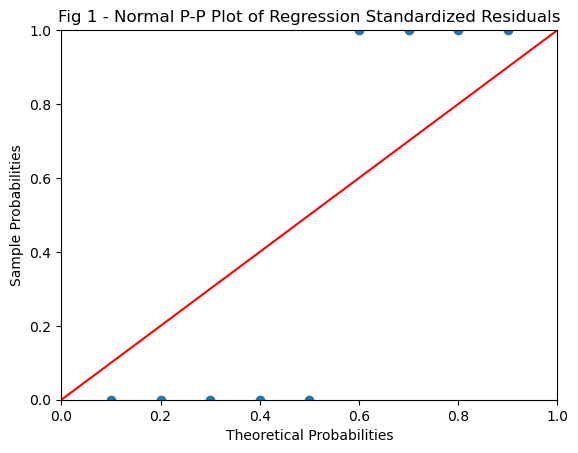

In [293]:
LinRegDF_resid = LinRegDF_lm.resid
probplot = sm.ProbPlot(LinRegDF_resid)
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

__Visualizing Linear Regression against the Training and Testing data__

In [294]:
LinRegDF
X = LinRegDF.iloc[:, :-1].values
Y = LinRegDF.iloc[:, 1].values

In [295]:
#Splitting Dataset into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 1/20, random_state = 0)

# Fitting Simple Linear Regression to the training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

LinearRegression()

<Figure size 1000x600 with 0 Axes>

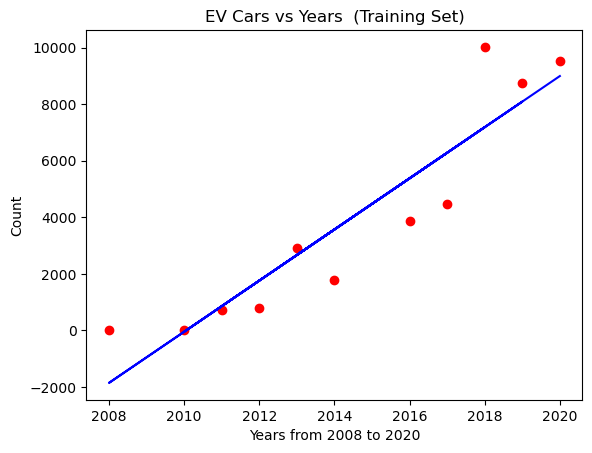

<Figure size 1000x600 with 0 Axes>

In [296]:
# Predicting the Test set result

Y_Pred = regressor.predict(X_Test)

#Visualising the Training set results

plt.scatter(X_Train, Y_Train, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('EV Cars vs Years  (Training Set)')
plt.xlabel('Years from 2008 to 2020')
plt.ylabel('Count')
plt.figure(figsize=(10, 6))

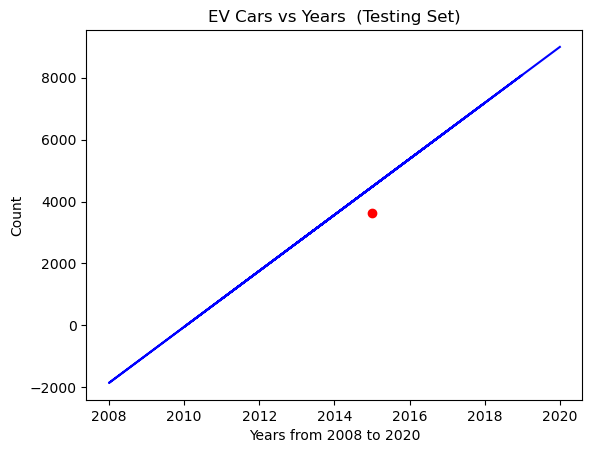

In [297]:
# Visualising the Test set results

plt.scatter(X_Test, Y_Test, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('EV Cars vs Years  (Testing Set)')
plt.xlabel('Years from 2008 to 2020')
plt.ylabel('Count')
plt.show()

## Multi Regression (Independent Variable: Year and Count, to see Growth in Electric Range)

In [298]:
#Calculating for EV Range Means from 2011 up until 2020
n=2011
listrange =[]
while n<2021:
    EV_2008=EV_df[EV_df['Model Year']== n]
    EV_2008['Electric Range'].mean()
    listrange.append(EV_2008['Electric Range'].mean())
    n = n+1
print(listrange)

[74.7489539748954, 106.00644329896907, 110.71321013004791, 128.93638392857142, 121.17279513408903, 135.98132295719844, 180.29876543209878, 209.7669360470917, 209.16853290676417, 279.3164848993289]


In [299]:
#Here n=1, is year 2011, and year 2020 is n=10
listyear = []
n=1
while n<11:
    listyear.append(n)
    n = n+1
print(listyear)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [300]:
ModelYearDF = EV_df[(EV_df['Model Year'] >= 2011) & (EV_df['Model Year'] <= 2020)]

In [301]:
#Presenting the Data
Year_Counts = ModelYearDF['Model Year'].value_counts().sort_index()
Year_Counts

2011      717
2012      776
2013     2922
2014     1792
2015     3617
2016     3855
2017     4455
2018    10023
2019     8752
2020     9536
Name: Model Year, dtype: int64

In [302]:
Years = Year_Counts.index
Values = Year_Counts.values

In [303]:
#Presenting the Data in a Tabular Format
EVrange_df1 = pd.DataFrame({'Year': listyear, 'Count': Values, 'Range': listrange})
EVrange_df1

,Year,Count,Range
0,1,717,74.748954
1,2,776,106.006443
2,3,2922,110.713210
3,4,1792,128.936384
4,5,3617,121.172795
5,6,3855,135.981323
6,7,4455,180.298765
7,8,10023,209.766936
8,9,8752,209.168533
9,10,9536,279.316485


In [304]:
#Examining the Statistics of the Multi-Regression
import pandas as pd
import statsmodels.api as sm

# The Independent variables: Year and Count
X2 = EVrange_df1[['Year', 'Count']]

# Add a constant (intercept) to the independent variables
X2 = sm.add_constant(X2)

# The Depependent Variable: Range
y2 = EVrange_df1['Range']

# Fitting the multiple regression model
model = sm.OLS(y2, X2).fit()

# Print the regression summary
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.887   
Dependent Variable: Range            AIC:                91.7105 
Date:               2023-10-05 11:07 BIC:                92.6183 
No. Observations:   10               Log-Likelihood:     -42.855 
Df Model:           2                F-statistic:        36.16   
Df Residuals:       7                Prob (F-statistic): 0.000204
R-squared:          0.912            Scale:              441.35  
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const      54.2933    15.9466   3.4047   0.0114   16.5856   92.0009
Year       14.4150     6.1619   2.3394   0.0519   -0.1555   28.9856
Count       0.0047     0.0053   0.9008   0.3976   -0.0077    0.0172
-----------------------------------------------------------------
Omnibus:              0.706        Durbin-Watson:           1.733
Prob(Omnibus):        0.703        Jarque-Bera (JB):        0.460
Skew:                 0.455        Prob(JB):                0.794
Kurtosis:             2.475        Condition No.:           14297
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

Text(0.5, 1.0, 'Predicted Values vs Actual Values')

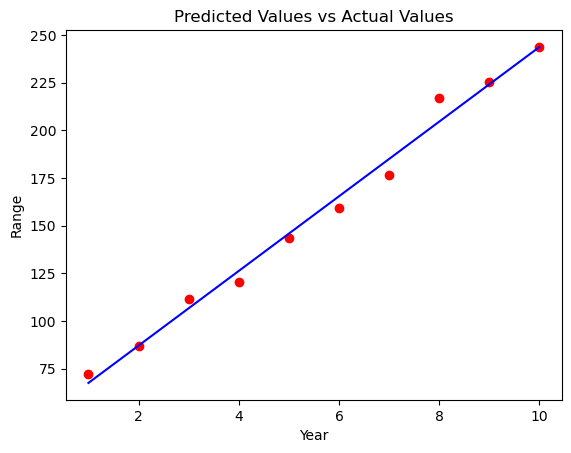

In [305]:
# Predicting the values vs the Actual Values
predicted = model.predict(X2)
predicted
EVrange_df1['predicted ranges']=predicted
plt.scatter(EVrange_df1['Year'], EVrange_df1['predicted ranges'], color = 'red')

coefficients = np.polyfit(EVrange_df1['Year'], EVrange_df1['predicted ranges'], 1)
slope, intercept = coefficients
best_fit_line = slope * EVrange_df1['Year'] + intercept
plt.plot(EVrange_df1['Year'], best_fit_line, color='blue', label='Best Fit Line')
plt.xlabel('Year')
plt.ylabel('Range')
plt.title('Predicted Values vs Actual Values')

## Optimization: Optimizing Acquisition Value (using Price and Electric Range)

In [306]:
# We concatenate keys, [Brand/Model] in order to have a new key as a variable

In [307]:
EV_df.head

<bound method NDFrame.head of         VIN (1-10)     County          City State  Postal Code  Model Year  \
0       KM8K33AGXL       King       Seattle    WA      98103.0        2020   
3       5YJ3E1EA7J       King      Kirkland    WA      98034.0        2018   
5       5YJ3E1EAXL  Snohomish    Marysville    WA      98271.0        2020   
7       5YJYGDEE3L       King   Woodinville    WA      98072.0        2020   
8       5YJ3E1EA1J     Island    Coupeville    WA      98239.0        2018   
...            ...        ...           ...   ...          ...         ...   
150458  5YJ3E1EB0J    Spokane  Liberty Lake    WA      99019.0        2018   
150461  5YJSA1E28G       King          Kent    WA      98030.0        2016   
150462  5YJ3E1ECXL     Pierce   Bonney Lake    WA      98391.0        2020   
150467  5YJYGDEF1L  Snohomish       Edmonds    WA      98026.0        2020   
150468  KNDJX3AE4G    Whatcom    Bellingham    WA      98225.0        2016   

           Make    Model         

In [308]:
EV_df['Model-Brand']=EV_df['Make']+EV_df['Model'].astype(str)

In [309]:
#Counting Unique Instances of Model and Brand
unique_mb=EV_df['Model-Brand'].unique()
unique_df=pd.DataFrame(unique_mb,columns=['BrandModel'])
print(unique_df)

                                BrandModel
0                              HYUNDAIKONA
1                             TESLAMODEL 3
2                             TESLAMODEL Y
3                               AUDIE-TRON
4                               NISSANLEAF
5                             TESLAMODEL S
6                               TOYOTARAV4
7                         VOLKSWAGENE-GOLF
8                                  KIANIRO
9                                  FIAT500
10                        CHEVROLETBOLT EV
11                               FORDFOCUS
12                            TESLAMODEL X
13                                   BMWI3
14                             MINIHARDTOP
15                          SMARTEQ FORTWO
16                                 KIASOUL
17                              KIASOUL EV
18                             SMARTFORTWO
19                             POLESTARPS2
20                            JAGUARI-PACE
21                          CHEVROLETSPARK
22         

* We have 32 variables!
* We will fixed our objetive function in just variables with bodytype = "Hatchback" and use the a two new datasets with body type and prices as attributes!

In [310]:
filter1=list(unique_df['BrandModel'])
filter2=['Hatchback']

In [311]:
#The Two New Datasets used to run optimizations
mydf2 = pd.read_csv("cars_us_22.csv")
mydf3 = pd.read_csv("data_m2.csv")

In [312]:
filtered_df=mydf2[mydf2['BrandModel'].isin(filter1)]

In [313]:
filtered_df_1=filtered_df[mydf2['Body.Type'].isin(filter2)]
filtered_df_1

,CORR.,Brand,Model.Number,BrandModel,Price,Photo,Engine.Type,Body.Type,Fuel.Type,Gearbox.Type,...,CD.Player,DVD.Player,Electric.Adjustable.Seats,Keyless.Entry,Tyre.Pressure.Monitor,Smart.Access.Card.Entry,Xenon.Headlamps,Halogen.Headlamps,Removable.Convertible.Top,Cassette.Player
120,121,BMW,I3,BMWI3,48300.0,https://www.ccarprice.com/products/BMW_7_Serie...,3.0L Turbo Inline-6 Gas,Hatchback,Petrol,Automatic,...,NaN,NaN,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN
243,244,Mitsubishi,I-MIEV,MITSUBISHII-MIEV,9999999.0,https://www.ccarprice.com/products/Hyundai_Aur...,1.0 l Kappa turbo GDi petrol,Hatchback,Electric,Manual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,385,Nissan,Leaf 2023,NISSANLEAF,27800.0,https://www.ccarprice.com/products/Nissan_Leaf...,Electric,Hatchback,Electric,Automatic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,573,Ford,Focus 2023,FORDFOCUS,47990.0,https://www.ccarprice.com/products/Ford_Focus_...,5.3L Turbocharged Inline 4 Petrol,Hatchback,Electric,Manual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1071,1072,Volkswagen,E-Golf 2022,VOLKSWAGENE-GOLF,23190.0,https://www.ccarprice.com/products/Volkswagen_...,NaN,Hatchback,Unknown,Automatic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932,1933,MINI,Cooper Electric Hardtop 2023,MINIHARDTOP,29900.0,https://www.ccarprice.com/products/Mini_Cooper...,Electric,Hatchback,Electric,Automatic,...,NaN,NaN,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN
1975,1976,Fiat,500 Icon 2022,FIAT500,22440.0,https://www.ccarprice.com/products/Fiat_500_Ic...,42kWh/one electric motor,Hatchback,Electric,Automatic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2274,2275,Tesla,Model S 2022,TESLAMODEL S,104990.0,https://www.ccarprice.com/products/Tesla_Model...,Electric,Hatchback,Electric,Automatic,...,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [314]:
filter3=list(filtered_df_1['BrandModel'])
filtered_df3=mydf3[mydf3['BrandModel'].isin(filter3)]
filtered_df3.keys()

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'BrandModel', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [315]:
# We model the coefficient per each variable considering Prices & Electric Range

In [316]:
#We weighted the criterias

In [317]:
criteria_price=0.5
criteria_elec=0.5

In [318]:
x1=criteria_price*(filtered_df_1['Price'].min()/48300) + (criteria_elec*(153/337))
x2=criteria_price*(filtered_df_1['Price'].min()/9999999) + (criteria_elec*(62/337))
x3=criteria_price*(filtered_df_1['Price'].min()/27800) + (criteria_elec*(84/337))
x4=criteria_price*(filtered_df_1['Price'].min()/47990) + (criteria_elec*(76/337))
x5=criteria_price*(filtered_df_1['Price'].min()/23190) + (criteria_elec*(125/337))
x6=criteria_price*(filtered_df_1['Price'].min()/29990)+ (criteria_elec*(110/337))
x7=criteria_price*(filtered_df_1['Price'].min()/22440)+ (criteria_elec*(87/337))
x8=criteria_price*(filtered_df_1['Price'].min()/104990)+ (criteria_elec*(337/337))

<!-- To meet the requirement 

The 2 cars need different time with each resource:

Total Time : Model 3 – 2 days; Model S – 14 days

Robot time: Model 3 – 1 days; Model S – 5 days

Engineer time: Model 3 – 0.5 days; Model S – 7 days

Detailer time: Model 3 – 0.5 days; Model S – 2 days

Model 3 cost of manufacturing is $28000 and Model S manufacturing cost is $44,000

Model 3 selling price $40,000 and Model S makes $90,000

From market Share 55% belongs to tesla, so assuming same for near future. 5500 cars need to be produced to meet the demand in Washington state.


May be we can work on optimising the schedule to meet the requiremnt? -->

__Objective Function:__ Since we need to optimize the acquisition value, which is a ratio, considering prices & Electric ranges

In [319]:
obj = [-x1, -x2, -x3, -x4,-x5,-x6,-x7,-x8] 

__LHS:__ LHS matrix of inequality equations

In [320]:
lhs = [[1,1,1,1,1,1,1,1],[0,0,0,0,1,0,0,0]]

__RHS:__ RHS matrix of inequality equations, we set as demand a forecast for the bodytype, and a constraint for an specific brand-model

In [321]:
rhs = [4000,100]

In [322]:
from scipy.optimize import linprog

In [323]:
lp_opt = linprog(c=obj,A_ub=lhs,b_ub=rhs,method = 'interior-point')

In [324]:
lp_opt

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -2520.3413792051065
       x: [ 5.247e-07  1.789e-07  9.008e-07  3.221e-07  1.000e+02
            9.925e-07  3.900e+03  2.799e-06]
     nit: 6

## Clustering: Identify Patterns between Price and Electric Range

In [325]:
import warnings
warnings.filterwarnings('ignore')

In [326]:
mydf.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn.cluster import KMeans

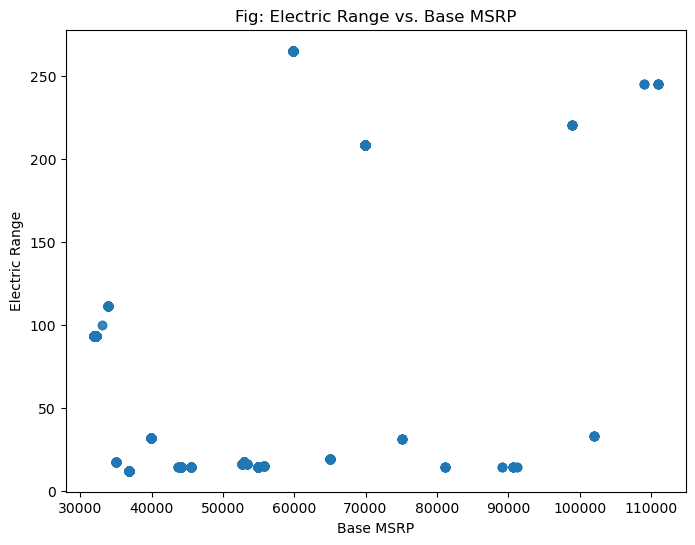

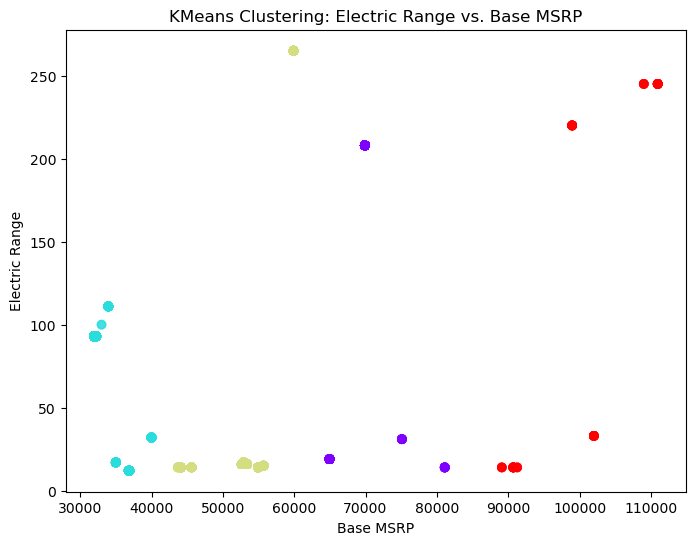

In [328]:
mydf = mydf.dropna(subset=['Base MSRP', 'Electric Range'])

mydf['Base MSRP'] = pd.to_numeric(mydf['Base MSRP'], errors='coerce')
mydf['Electric Range'] = pd.to_numeric(mydf['Electric Range'], errors='coerce')

# filter outliers
mydf = mydf[(mydf['Base MSRP'] != 0) & (mydf['Base MSRP'] <= 150000)]

# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mydf["Base MSRP"], mydf["Electric Range"], marker='o', alpha=0.5)
plt.xlabel("Base MSRP")
plt.ylabel("Electric Range")
plt.title("Fig: Electric Range vs. Base MSRP")
plt.show()

# Fit KMeans clustering
X = mydf[['Base MSRP', 'Electric Range']]
clusters = KMeans(n_clusters=4)
clusters.fit(X)

# cluster centers and labels
cluster_centers = clusters.cluster_centers_
labels = clusters.labels_
mydf['Cluster'] = labels

# plotting
plt.figure(figsize=(8, 6))
plt.scatter(mydf["Base MSRP"], mydf["Electric Range"], c=mydf['Cluster'], cmap='rainbow', alpha=0.5)
plt.xlabel("Base MSRP")
plt.ylabel("Electric Range")
plt.title("KMeans Clustering: Electric Range vs. Base MSRP")
plt.show()

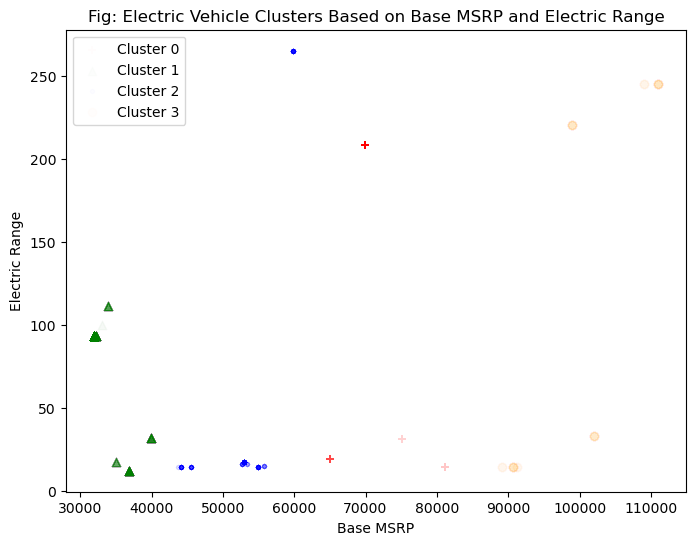

In [329]:
# define markers and colors
markers = ['+', '^', '.', 'o']
colors = ['red', 'green', 'blue', 'orange']

# scatter plot
plt.figure(figsize=(8, 6))

for i, cluster_id in enumerate(mydf['Cluster'].unique()):
    cluster_data = mydf[mydf['Cluster'] == cluster_id]
    plt.scatter(cluster_data["Base MSRP"], cluster_data["Electric Range"], marker=markers[i], color=colors[i], label=f'Cluster {cluster_id}', alpha=0.01)

plt.xlabel("Base MSRP")
plt.ylabel("Electric Range")
plt.title("Fig: Electric Vehicle Clusters Based on Base MSRP and Electric Range")

plt.legend()
plt.show()


In [330]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaled_mydf = scaler.fit_transform(mydf[["Base MSRP", "Electric Range"]] )
scaled_mydf[0:5]

array([[ 0.7882423 ,  0.93928584],
       [ 0.7882423 ,  0.93928584],
       [ 0.7882423 ,  0.93928584],
       [-1.45026846, -0.34529094],
       [-1.45026846, -0.34529094]])

In [331]:
from sklearn.cluster import KMeans
clusters_new = KMeans( 3, random_state=42 )
clusters_new.fit( scaled_mydf )
mydf["clusterid_new"] = clusters_new.labels_

In [332]:
clusters.cluster_centers_

array([[6.98228979e+04, 1.93861361e+02],
       [3.41201765e+04, 6.89896158e+01],
       [5.26486111e+04, 5.57173913e+01],
       [1.00225000e+05, 1.27882979e+02]])

In [333]:
# group by cluster and calculating mean and std for variables
cluster_summary = mydf.groupby('Cluster')[['Base MSRP', 'Electric Range']].agg(["mean", "std"]).reset_index()
print(cluster_summary)


  Cluster      Base MSRP              Electric Range            
                    mean          std           mean         std
0       0   69822.897946  1758.112856     193.861361   49.651425
1       1   34120.176532  2822.702563      68.989616   36.539073
2       2   52648.611111  4955.887135      55.717391   92.025126
3       3  100225.000000  7970.458730     127.882979  108.132322


## Webscraping: To Conclude and Provide 7 GTM Success Steps
* Retrieve information on What has lead to the growth of EV Cars?
https://www.mckinsey.com/industries/automotive-and-assembly/our-insights/electric-vehicle-buyers-demand-new-experiences

In [334]:
from bs4 import BeautifulSoup
import requests

url = 'https://www.mckinsey.com/industries/automotive-and-assembly/our-insights/leaving-the-niche-seven-steps-for-a-successful-go-to-market-model-for-electric-vehicles'

page = requests.get(url)
soup = BeautifulSoup(page.text,'html')

alltext= soup.find('div', class_='mdc-o-content-body mck-u-dropcap')
alltext
heading= alltext.find_all('h2')
subheadings = alltext.find_all('h3')

text = 'To date, electric vehicles (EVs)'
paragraphs = alltext.find_all('p')

#Printing the title tag for the post
match = soup.title.text
print(match)
print('')

date = soup.time.text
print(date)
print('')
lst = []
for para in subheadings:
    lst.append(para.text)

for i in range(5,len(lst)):
    print(lst[i])

print('')
print ("Read More at:", "https://www.mckinsey.com/industries/automotive-and-assembly/our-insights/leaving-the-niche-seven-steps-for-a-successful-go-to-market-model-for-electric-vehicles")

Leaving the niche: Seven steps for a successful go-to-market model for electric vehicles | McKinsey

June 29, 2020

1. Reinvent brand positioning
2. Shape the charging ecosystem
3. Generate income from the life cycle
4. Massively reskill and refocus the sales force
5. Perfect the omnichannel approach
6. Upgrade after-sales customer-centricity and readiness
7. Transform the business model to achieve profitability at scale

Read More at: https://www.mckinsey.com/industries/automotive-and-assembly/our-insights/leaving-the-niche-seven-steps-for-a-successful-go-to-market-model-for-electric-vehicles
